In [3]:
import function_list
import os
base_path,data_path,output = function_list.folder_setup()

In [11]:
os.chdir(data_path)
beds = pd.read_csv('bed_size.csv')
os.chdir(output)

In [16]:
#sort descending by Area
beds.sort_values(by='Area',ascending=False,inplace=True)

## To-Do
* Add annotations
* Consider alt colors
* Add source info

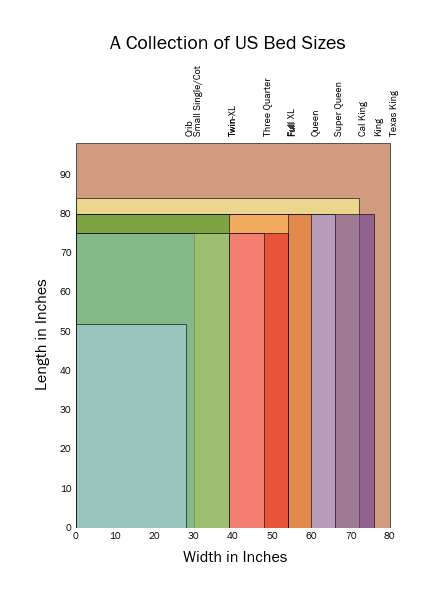

In [40]:
#Create chart

fig = figure(figsize=(8,8))

fig.suptitle('A Collection of US Bed Sizes',fontsize=20)

ax = fig.add_subplot(111,aspect='equal')

plt.subplots_adjust(top=.8)

for item in range(len(beds)):
    ax.add_patch(patches.Rectangle((0,0),
               width=beds['Width'][item],edgecolor='black',
               height=beds['Length'][item],alpha=.6,facecolor=beds['Color'][item],zorder=beds.index[item]))
    
    ax.annotate(beds['Bed'][item],xy=(beds['Width'][item],beds['Length'][item]),
                xytext=(beds['Width'][item],100),ha='left',va='bottom',rotation=90)
    
ax.set_xlim(0,beds['Width'].max()+1)
ax.set_ylim(0,beds['Length'].max()+1)
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.set_xlabel('Width in Inches',fontsize=16)
ax.set_ylabel('Length in Inches',fontsize=16)

ax.grid(False)

In [29]:
beds.columns.values

array(['Bed', 'Width', 'Length', 'Area', 'Color', 'Alt_Color',
       'Standard Size',
       'http://www.sizechart.com/home/bed-size/us/index.html'], dtype=object)